In [ ]:
seed = 42  # for reproducibility

import pickle
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False
%matplotlib inline

import os
import sys
from pathlib import Path
import torch
import torch.nn.functional as F
from torchvision.utils import make_grid, save_image
from sklearn.metrics import plot_confusion_matrix
torch.manual_seed(seed)
sys.path.append(str(Path().absolute().parent))
plt.style.use('seaborn')

In [3]:
exp_path = Path().absolute().parent.parent.joinpath('src/experiments/0243_120CDS_DenseNet121_TUNING')
clog_path = 'experiments/0244_120CDS_DenseNet121_TUNINGClient_Logs'
all_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/all')

In [4]:
pickle_file = 'log.pkl'
with open(all_path.joinpath(pickle_file), 'rb') as handle:
    CDS_metrics = pickle.load(handle)
CDS_metrics['LMLD_val_AUC'][1][-1]  

{'jarv': 0.8975556343019135,
 'stge': 0.9259385450847599,
 'inbreast': 0.8984375,
 'bcdr': 0.8646616541353384,
 'cmmd': 0.9068925928203866}

In [7]:
exp_path = Path().absolute().parent.parent.joinpath('src/experiments/0258_10CDS_LocalTuning_DenseNet121')
clog_path = 'experiments/0259_10CDS_LocalTuning_DenseNet121Client_Logs'
stge_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/stge')
jarv_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/jarv')
bcdr_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/bcdr')
inbreast_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/inbreast')
cmmd_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/cmmd')

In [8]:
pickle_file = 'log.pkl'
with open(exp_path.joinpath(pickle_file), 'rb') as handle:
    aggregated_metrics = pickle.load(handle)
    
with open(stge_path.joinpath(pickle_file), 'rb') as handle:
    stge_metrics = pickle.load(handle)
with open(jarv_path.joinpath(pickle_file), 'rb') as handle:
    jarv_metrics = pickle.load(handle)
    
with open(inbreast_path.joinpath(pickle_file), 'rb') as handle:
    inbreast_metrics = pickle.load(handle)
    
with open(bcdr_path.joinpath(pickle_file), 'rb') as handle:
    bcdr_metrics = pickle.load(handle)
    
with open(cmmd_path.joinpath(pickle_file), 'rb') as handle:
    cmmd_metrics = pickle.load(handle)

In [10]:
final_r = list(inbreast_metrics['LMLD_val_AUC'].keys())[-1]
print(inbreast_metrics['LMLD_val_AUC'][final_r][-1], bcdr_metrics['LMLD_val_AUC'][final_r][-1], stge_metrics['LMLD_val_AUC'][final_r][-1], jarv_metrics['LMLD_val_AUC'][final_r][-1], cmmd_metrics['LMLD_val_AUC'][final_r][-1]) 

0.8721227621483376 0.9166666666666667 0.7757302324443699 0.8234493209370157 0.8887669451049732


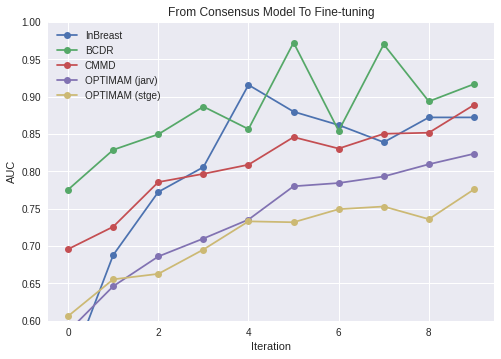

In [12]:
steps = list(range(len(cmmd_metrics['LMLD_val_AUC'][final_r])))
plt.plot(steps, inbreast_metrics['LMLD_val_AUC'][final_r],'-o', label='InBreast')
plt.plot(steps, bcdr_metrics['LMLD_val_AUC'][final_r],'-o', label='BCDR')
plt.plot(steps, cmmd_metrics['LMLD_val_AUC'][final_r],'-o', label='CMMD')
plt.plot(steps, jarv_metrics['LMLD_val_AUC'][final_r],'-o', label='OPTIMAM (jarv)')
plt.plot(steps, stge_metrics['LMLD_val_AUC'][final_r],'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0.6,1)
plt.ylabel('AUC')
plt.title('From Consensus Model To Fine-tuning')
plt.savefig('./plots/FineTuning-{}.png'.format(clog_path.split('/')[-1][:-11]))